<a href="https://www.kaggle.com/code/shivanikushwaha/covid-19-dashboard-1?scriptVersionId=124037938" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas import timestamp
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:

df_state = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv") 
df_covid = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_vacc = pd.read_csv("../input/covid19-in-india/covid_vaccine_statewise.csv")

In [3]:
df_state['State'].unique(), df_state['State'].nunique()

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 36)

In [4]:
df_vacc['State'].unique(), df_vacc['State'].nunique()

(array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 37)

In [5]:
df_covid['State/UnionTerritory'].unique(), df_covid['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [6]:
dict(zip(df_vacc['State'].unique(), df_vacc['State'].unique()))

{'India': 'India',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Assam': 'Assam',
 'Bihar': 'Bihar',
 'Chandigarh': 'Chandigarh',
 'Chhattisgarh': 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi': 'Delhi',
 'Goa': 'Goa',
 'Gujarat': 'Gujarat',
 'Haryana': 'Haryana',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Jharkhand': 'Jharkhand',
 'Karnataka': 'Karnataka',
 'Kerala': 'Kerala',
 'Ladakh': 'Ladakh',
 'Lakshadweep': 'Lakshadweep',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Maharashtra': 'Maharashtra',
 'Manipur': 'Manipur',
 'Meghalaya': 'Meghalaya',
 'Mizoram': 'Mizoram',
 'Nagaland': 'Nagaland',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'Punjab': 'Punjab',
 'Rajasthan': 'Rajasthan',
 'Sikkim': 'Sikkim',
 'Tamil Nadu': 'Tamil Nadu',
 'Telangana': 'Telangana',
 'Tripura': 'Trip

In [7]:
dict(zip(df_vacc['State'].unique(), df_vacc['State'].unique()))

{'India': 'India',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Assam': 'Assam',
 'Bihar': 'Bihar',
 'Chandigarh': 'Chandigarh',
 'Chhattisgarh': 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi': 'Delhi',
 'Goa': 'Goa',
 'Gujarat': 'Gujarat',
 'Haryana': 'Haryana',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Jharkhand': 'Jharkhand',
 'Karnataka': 'Karnataka',
 'Kerala': 'Kerala',
 'Ladakh': 'Ladakh',
 'Lakshadweep': 'Lakshadweep',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Maharashtra': 'Maharashtra',
 'Manipur': 'Manipur',
 'Meghalaya': 'Meghalaya',
 'Mizoram': 'Mizoram',
 'Nagaland': 'Nagaland',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'Punjab': 'Punjab',
 'Rajasthan': 'Rajasthan',
 'Sikkim': 'Sikkim',
 'Tamil Nadu': 'Tamil Nadu',
 'Telangana': 'Telangana',
 'Tripura': 'Trip

In [8]:
state_correction_dict = {
  'Bihar****': 'Bihar',
  'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
  'Madhya Pradesh***': 'Madhya Pradesh',
  'Maharashtra***': 'Maharashtra','Himachal Pradesh':'Himanchal Pradesh','Karnataka':'Karanataka',
'Telengana':'Telangana','Dadra and Nagar Haveli and Daman and Diu':'Daman & Diu'}

In [9]:
def state_correction(state):
  try:
    return state_correction_dict[state]
  except:
    return state

In [10]:
df_covid['State/UnionTerritory'] = df_covid['State/UnionTerritory'].apply(state_correction)

In [11]:
df_vacc['Updated On'] = pd.to_datetime(df_vacc['Updated On'])
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

In [12]:
df_state.columns, df_state.shape

(Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object'),
 (16336, 5))

In [13]:
df_covid.columns, df_covid.shape

(Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
        'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
        'Deaths', 'Confirmed'],
       dtype='object'),
 (18110, 9))

In [14]:
df = df_covid.merge(df_state, left_on = ["State/UnionTerritory","Date"], right_on=["State","Date"], how='left')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18111 entries, 0 to 18110
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18111 non-null  int64         
 1   Date                      18111 non-null  datetime64[ns]
 2   Time                      18111 non-null  object        
 3   State/UnionTerritory      18111 non-null  object        
 4   ConfirmedIndianNational   18111 non-null  object        
 5   ConfirmedForeignNational  18111 non-null  object        
 6   Cured                     18111 non-null  int64         
 7   Deaths                    18111 non-null  int64         
 8   Confirmed                 18111 non-null  int64         
 9   State                     15131 non-null  object        
 10  TotalSamples              15131 non-null  float64       
 11  Negative                  6148 non-null   object        
 12  Positive          

In [16]:
df.shape # gives the number of rows and columns in df

(18111, 13)

In [17]:
df_head=df.head(10) # head() displays first 10 rows of df
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.
df_head.describe() 

,Sno,Cured,Deaths,Confirmed,TotalSamples,Positive
count,10.00000,10.0,10.0,10.000000,0.0,0.0
mean,5.50000,0.0,0.0,2.500000,NaN,NaN
std,3.02765,0.0,0.0,0.849837,NaN,NaN
min,1.00000,0.0,0.0,1.000000,NaN,NaN
25%,3.25000,0.0,0.0,2.250000,NaN,NaN
50%,5.50000,0.0,0.0,3.000000,NaN,NaN
75%,7.75000,0.0,0.0,3.000000,NaN,NaN
max,10.00000,0.0,0.0,3.000000,NaN,NaN


In [18]:
num=df.select_dtypes(exclude=['object']).columns # 
num

Index(['Sno', 'Date', 'Cured', 'Deaths', 'Confirmed', 'TotalSamples',
       'Positive'],
      dtype='object')

In [19]:
strings=df.select_dtypes(include=['object']).columns
strings

Index(['Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'State', 'Negative'],
      dtype='object')

In [20]:
df1=df.groupby(['State/UnionTerritory'])['Confirmed'].rank()
df1

0          1.5
1          1.5
2          3.0
3         21.0
4         21.0
         ...  
18106    528.0
18107    492.0
18108    515.0
18109    527.0
18110    512.0
Name: Confirmed, Length: 18111, dtype: float64

In [21]:
df.isna()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,False,False,False,False,False,False,False,False,False,True,True,True,True
18107,False,False,False,False,False,False,False,False,False,True,True,True,True
18108,False,False,False,False,False,False,False,False,False,True,True,True,True
18109,False,False,False,False,False,False,False,False,False,True,True,True,True


**Histogram to show Cured Cases**

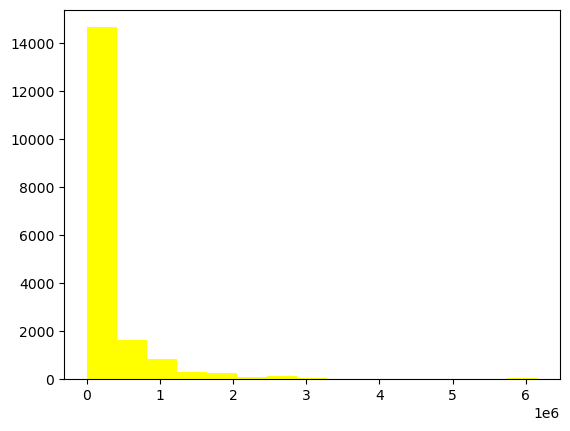

In [22]:
import matplotlib.pyplot as plt
plt.hist(df['Cured'], bins=15, color= "Yellow" )
plt.show()

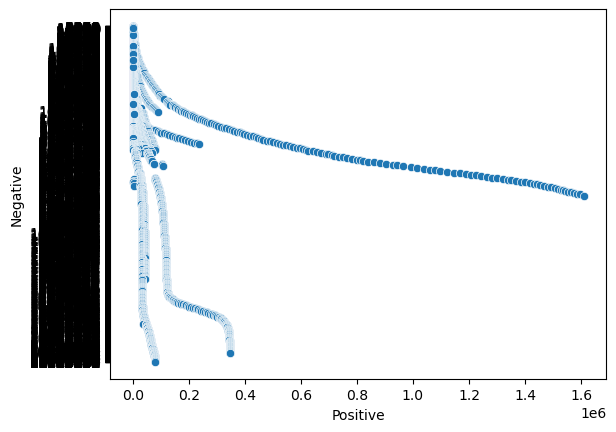

In [23]:
color = ['lightcoral', 'darkorange']
sns.scatterplot(x=df["Positive"],y= df["Negative"])
plt.show()

In [24]:
df['Day'],df['Month'],df['Year']=df['Date'].dt.day,df['Date'].dt.month,df['Date'].dt.year
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive,Day,Month,Year
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN,30,1,2020
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN,31,1,2020
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,NaN,NaN,NaN,NaN,1,2,2020
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN,2,2,2020
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN,3,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,NaN,NaN,NaN,NaN,11,8,2021
18107,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,NaN,NaN,NaN,NaN,11,8,2021
18108,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,NaN,NaN,NaN,NaN,11,8,2021
18109,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,NaN,NaN,NaN,NaN,11,8,2021


In [25]:
df3=df[df['Year']==2020] # slicing dataframe on basis of Year 2020

In [26]:
df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive,Day,Month,Year
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN,30,1,2020
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN,31,1,2020
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,NaN,NaN,NaN,NaN,1,2,2020
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN,2,2,2020
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN,3,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,10078,2020-12-31,8:00 AM,Telangana,-,-,278839,1541,286354,Telangana,6882694.0,NaN,NaN,31,12,2020
10079,10079,2020-12-31,8:00 AM,Tripura,-,-,32751,385,33264,Tripura,578723.0,545462,33261.0,31,12,2020
10080,10080,2020-12-31,8:00 AM,Uttarakhand,-,-,84149,1504,90616,Uttarakhand,1777371.0,1686451,NaN,31,12,2020
10081,10081,2020-12-31,8:00 AM,Uttar Pradesh,-,-,562459,8352,584966,Uttar Pradesh,23943169.0,NaN,NaN,31,12,2020


In [27]:
df4=df[df['Year']==2021] # slicing dataframe on basis of Year 2021
df4

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive,Day,Month,Year
10083,10083,2021-01-01,8:00 AM,Andhra Pradesh,-,-,871916,7108,882286,Andhra Pradesh,11884085.0,11001473,NaN,1,1,2021
10084,10084,2021-01-01,8:00 AM,Andaman and Nicobar Islands,-,-,4826,62,4945,Andaman and Nicobar Islands,182631.0,NaN,4946.0,1,1,2021
10085,10085,2021-01-01,8:00 AM,Arunachal Pradesh,-,-,16564,56,16719,Arunachal Pradesh,378364.0,NaN,NaN,1,1,2021
10086,10086,2021-01-01,8:00 AM,Assam,-,-,211910,1045,216211,Assam,6014286.0,NaN,NaN,1,1,2021
10087,10087,2021-01-01,8:00 AM,Bihar,-,-,245476,1397,251743,Bihar,18442165.0,NaN,NaN,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,NaN,NaN,NaN,NaN,11,8,2021
18107,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,NaN,NaN,NaN,NaN,11,8,2021
18108,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,NaN,NaN,NaN,NaN,11,8,2021
18109,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,NaN,NaN,NaN,NaN,11,8,2021


In [28]:
df5=df3.groupby(['State/UnionTerritory'])['Confirmed','Deaths','Cured'].max() # finding max value of columns 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [29]:
df5.reset_index(inplace=True)

In [30]:
df5.columns #gives list of columns in dataframe

Index(['State/UnionTerritory', 'Confirmed', 'Deaths', 'Cured'], dtype='object')

In [31]:
df5=df5.drop(labels=[5,34],axis=0) 
df5

,State/UnionTerritory,Confirmed,Deaths,Cured
0,Andaman and Nicobar Islands,4941,62,4820
1,Andhra Pradesh,881948,7104,871588
2,Arunachal Pradesh,16711,56,16549
3,Assam,216139,1043,211838
4,Bihar,251348,1393,245156
6,Chandigarh,19682,316,18967
7,Chhattisgarh,278540,3350,263251
8,Daman & Diu,3375,2,3364
9,Delhi,624795,10523,608434
10,Goa,50981,737,49313


**State wise confirmed cases in India**

Text(0.5, 1.0, 'State/union territory wise confirmed cases in 2020')

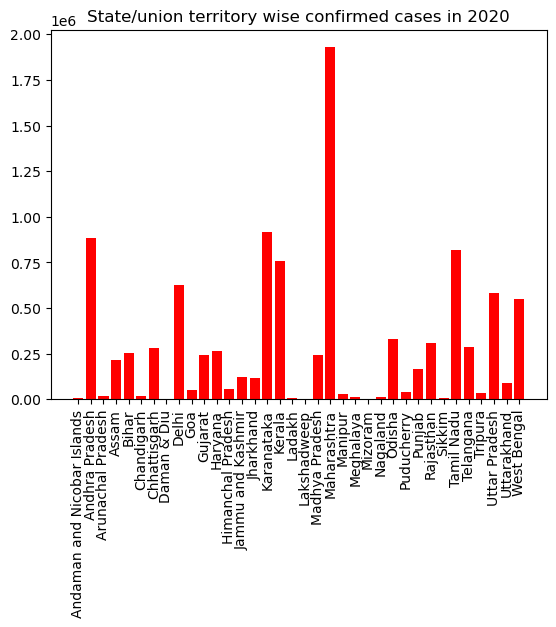

In [32]:
plt.bar(df5['State/UnionTerritory'],df5['Confirmed'], color = "Red")
plt.xticks(rotation = 90)
plt.title("State/union territory wise confirmed cases in 2020")

*conclusion: Maximum amount of confirmed cases in india were in Maharashtra.*

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

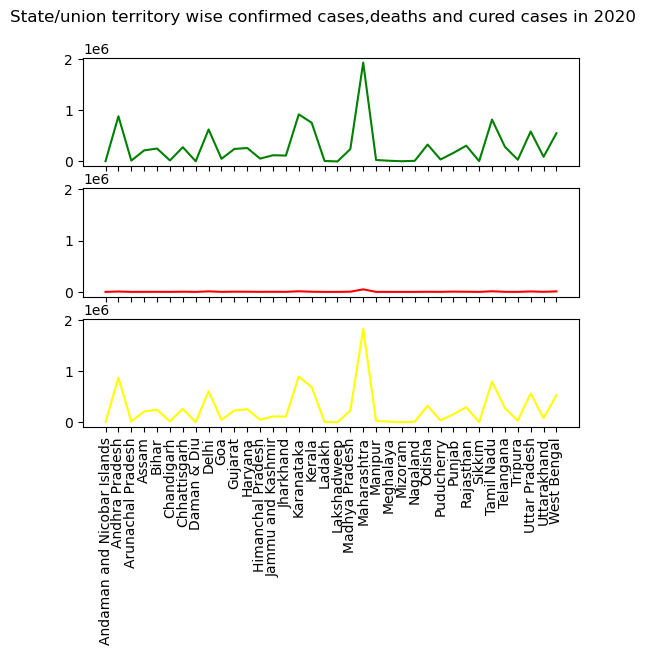

In [33]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle("State/union territory wise confirmed cases,deaths and cured cases in 2020")
axs[0].plot(df5['State/UnionTerritory'],df5['Confirmed'], color = "Green")
axs[1].plot(df5['State/UnionTerritory'],df5['Deaths'], color = "Red")
axs[2].plot(df5['State/UnionTerritory'],df5['Cured'], color = "Yellow")
plt.xticks(rotation = 90)

In [34]:
data=df5['Confirmed'].sum(),df5['Cured'].sum(),df5['Deaths'].sum()
data

(10266674, 9860280, 148738)

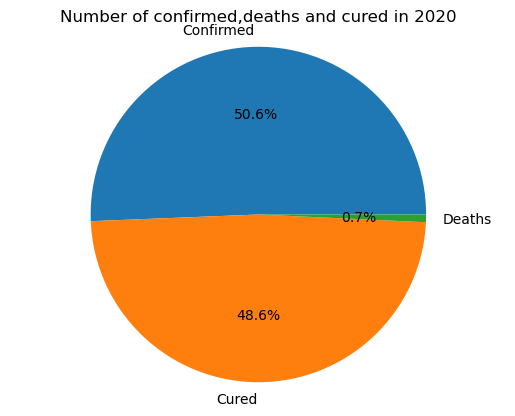

In [35]:
my_labels = 'Confirmed','Cured','Deaths'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Number of confirmed,deaths and cured in 2020')
plt.show()